In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, Birch
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df = pd.read_csv("/content/breast cancer ds.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
###preprocessing
# Remove unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Optionally, keep labels for evaluation purposes
labels_true = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df.drop(['diagnosis'], axis=1, inplace=True)

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [23]:
# BIRCH clustering
birch_model = Birch(n_clusters=2)
birch_clusters = birch_model.fit_predict(df_scaled)
print("Silhouette Coefficient for BIRCH: %0.3f" % metrics.silhouette_score(df_scaled, birch_clusters))

Silhouette Coefficient for BIRCH: 0.339


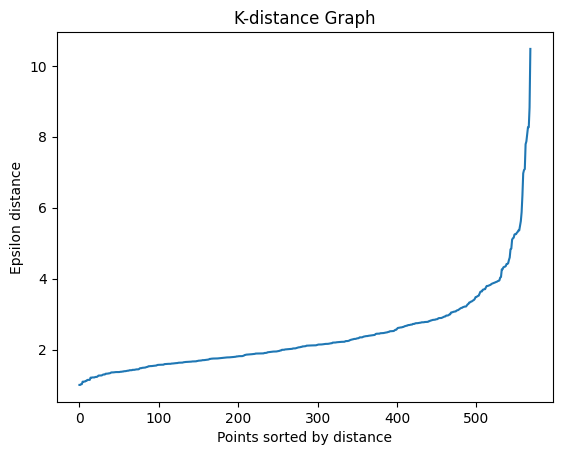

In [24]:
###Find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

###Sort and plot distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.show()

In [25]:
###DBScan
eps_value = 2.0
min_samples_value = 5

dbscan_model = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_clusters = dbscan_model.fit_predict(df_scaled)

###Check if there are at least two clusters (excluding noise)
unique_labels = set(dbscan_clusters)
if len(unique_labels) > 1:
    print("Silhouette Coefficient for DBSCAN: %0.3f" % metrics.silhouette_score(df_scaled, dbscan_clusters))
else:
    print("Try adjusting eps and min_samples again. Current labels:", unique_labels)

Silhouette Coefficient for DBSCAN: -0.199


In [26]:
# Compare clustering with true labels if desired
print("Adjusted Rand Index for BIRCH: %0.3f" % metrics.adjusted_rand_score(labels_true, birch_clusters))
print("Adjusted Rand Index for DBSCAN: %0.3f" % metrics.adjusted_rand_score(labels_true, dbscan_clusters))

Adjusted Rand Index for BIRCH: 0.575
Adjusted Rand Index for DBSCAN: 0.096
